In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df=pd.read_excel('/content/global_superstore_2016.xlsx')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.770,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,1.010,Medium
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.720,5,0.2,3.3440,1.930,High
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,OFF-AR-5321,Office Supplies,Art,Newell 341,8.560,2,0.0,2.4824,1.580,High
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,1.003,Medium


In [ ]:
a = (df["Sales"] - df["Profit"]).sum()
print("Total Cost =", a)

Total Cost = 11175044.6186


In [ ]:
a = df[df["Country"] == "India"]["Profit"].sum()
print("Total Profit in India =", a)

Total Profit in India = 129050.595


In [ ]:
df['Cost'] = df['Sales'] - df['Profit']
a = (df.groupby("Country")["Cost"].sum().sort_values())
fifth_last_country = a.index[4]
fifth_last_country

'Armenia'

In [ ]:
df['OrderYear'] = df['Order Date'].dt.year
a = df[df['OrderYear'] == 2015]['Sales'].sum()
print("Total Sales in 2015 =", a)

Total Sales in 2015 = 4299865.870560001


In [ ]:
sales_difference = total_sales_2015 - total_sales_2014
print("Difference between 2015 sales and 2014 sales =", sales_difference)

Difference between 2015 sales and 2014 sales = 894119.4211800005


In [ ]:
quantity_china_2015 = df[(df['Country'] == 'China') & (df['OrderYear'] == 2015)]['Quantity'].sum()
print(f"Total Quantity Sold in China in 2015 = {quantity_china_2015}")

Total Quantity Sold in China in 2015 = 2293


In [ ]:
df["Discount Amount"] = df["Discount"] * df["Sales"]
total_discount = df["Discount Amount"].sum()
total_discount

np.float64(1346352.04021416)

In [ ]:
quantity_china_australia = df[(df['Country'] == 'China') | (df['Country'] == 'Australia')]['Quantity'].sum()
print(f"Total Quantity Sold in China and Australia = {quantity_china_australia}")

Total Quantity Sold in China and Australia = 17754


In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
july_2015_df = df[(df["Order Date"].dt.year == 2015) & (df["Order Date"].dt.month == 7)]

total_profit= july_2015_df["Profit"].sum()
total_sales= july_2015_df["Sales"].sum()
total_cost = total_sales_july_2015 - total_profit_july_2015

print(total_profit)
print(total_cost)

28035.87258
230669.8079


In [ ]:
consumer_line_items = len(df[df['Segment'] == 'Consumer'])
print(f"Total number of line items in the Consumer Segment: {consumer_line_items}")

Total number of line items in the Consumer Segment: 26518


In [ ]:
df.shape

(51290, 24)

In [ ]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [ ]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2014-05-11 21:26:49.155780608,2014-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.478567
min,1.00000,2012-01-01 00:00:00,2012-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,12823.25000,2013-06-19 00:00:00,2013-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2014-07-08 00:00:00,2014-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2015-05-22 00:00:00,2015-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2015-12-31 00:00:00,2016-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.251373


In [ ]:
pd.isnull(df).sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Postal Code,41296
City,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
pd.isnull(df).sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Postal Code,0
City,0


In [ ]:
print("\nData Types:")
print(df.dtypes)


Data Types:
Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Postal Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object


In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

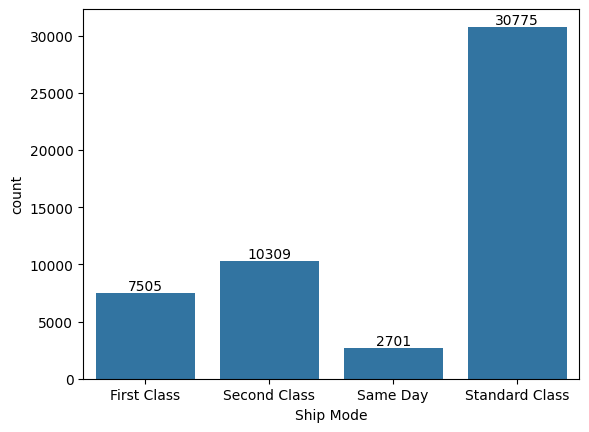

In [ ]:
a=sns.countplot(x='Ship Mode',data=df)
for bars in a.containers:
  a.bar_label(bars)

<Axes: xlabel='Ship Mode', ylabel='Discount'>

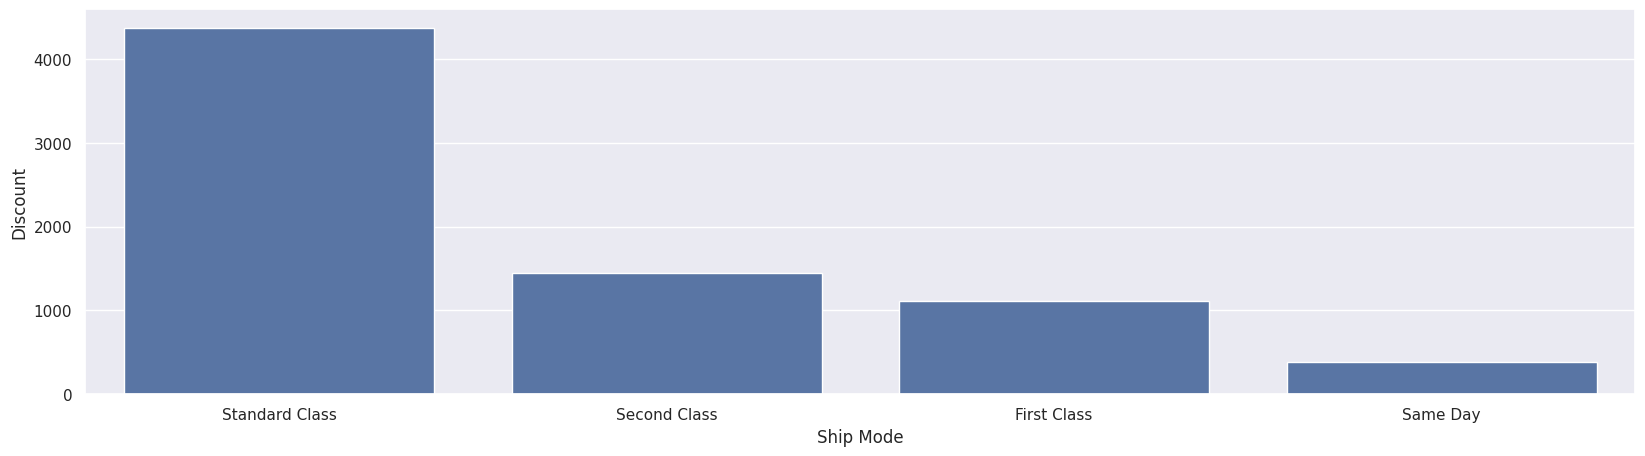

In [ ]:
a=df.groupby(['Ship Mode'],as_index=False)['Discount'].sum().sort_values(by='Discount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=a,x='Ship Mode',y='Discount')

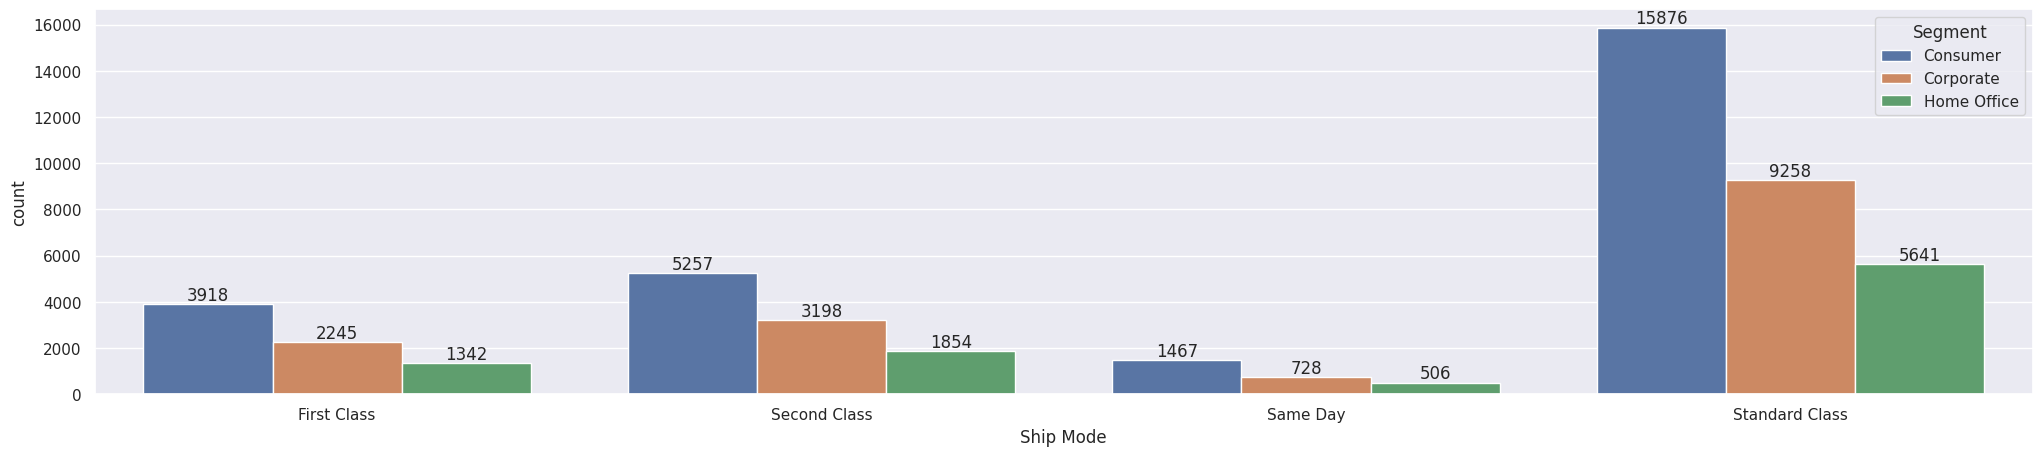

In [ ]:
ax=sns.countplot(data=df,x='Ship Mode',hue='Segment')
sns.set(rc={'figure.figsize':(25,5)})
for bars in ax.containers:
  ax.bar_label(bars)

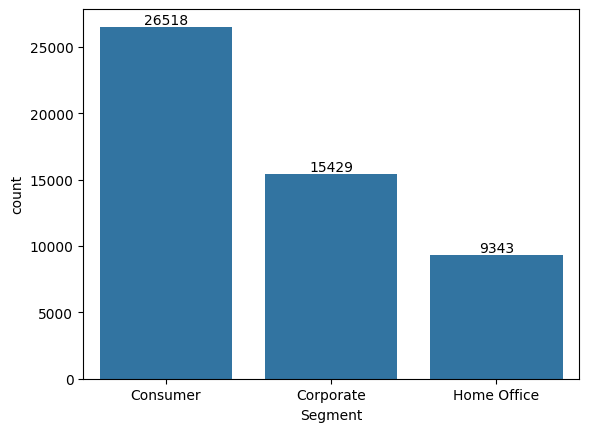

In [ ]:
a=sns.countplot(x='Segment',data=df)
for bars in a.containers:
  a.bar_label(bars)

<Axes: xlabel='Segment', ylabel='Discount'>

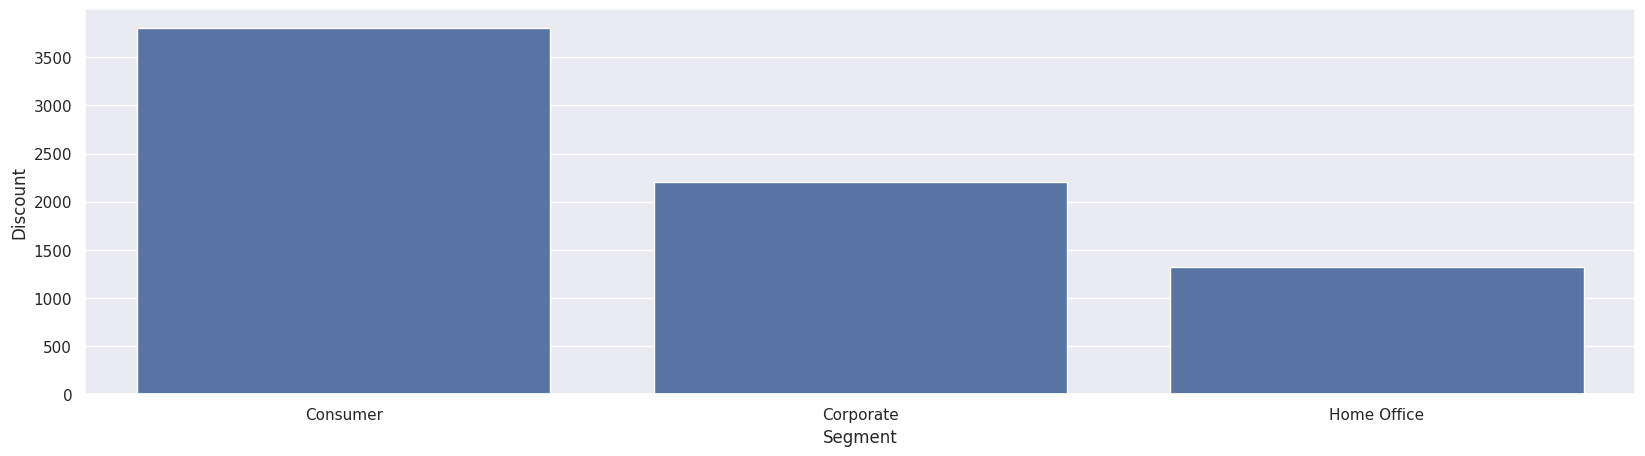

In [ ]:
a=df.groupby(['Segment'],as_index=False)['Discount'].sum().sort_values(by='Discount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=a,x='Segment',y='Discount')

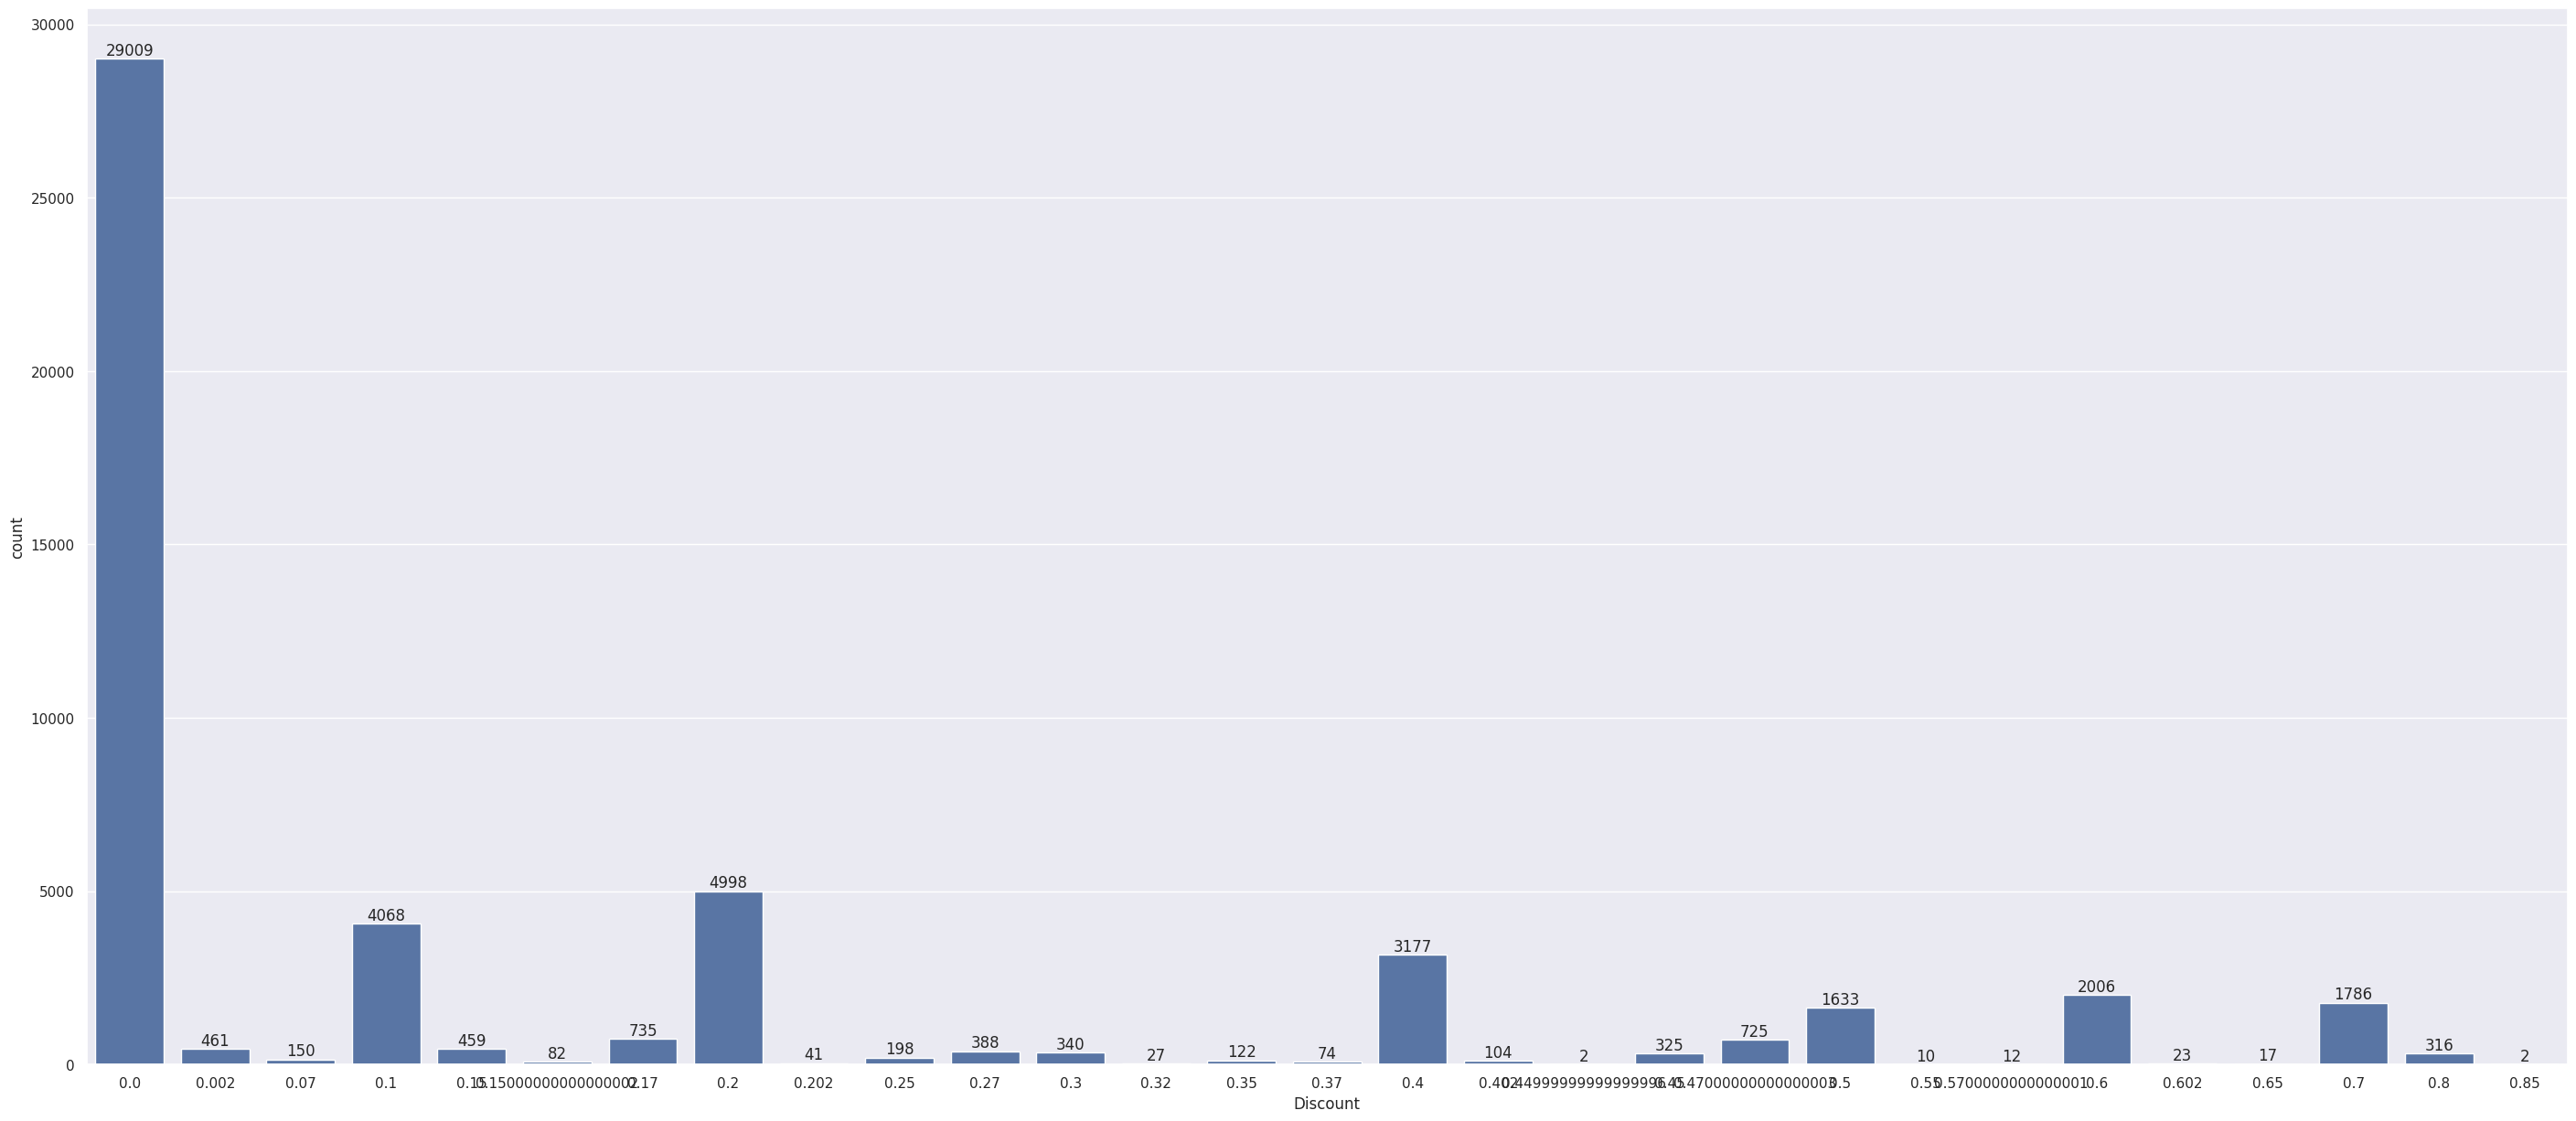

In [ ]:
a=sns.countplot(x='Discount',data=df)
sns.set(rc={'figure.figsize':(35,5)})
for bars in a.containers:
  a.bar_label(bars)

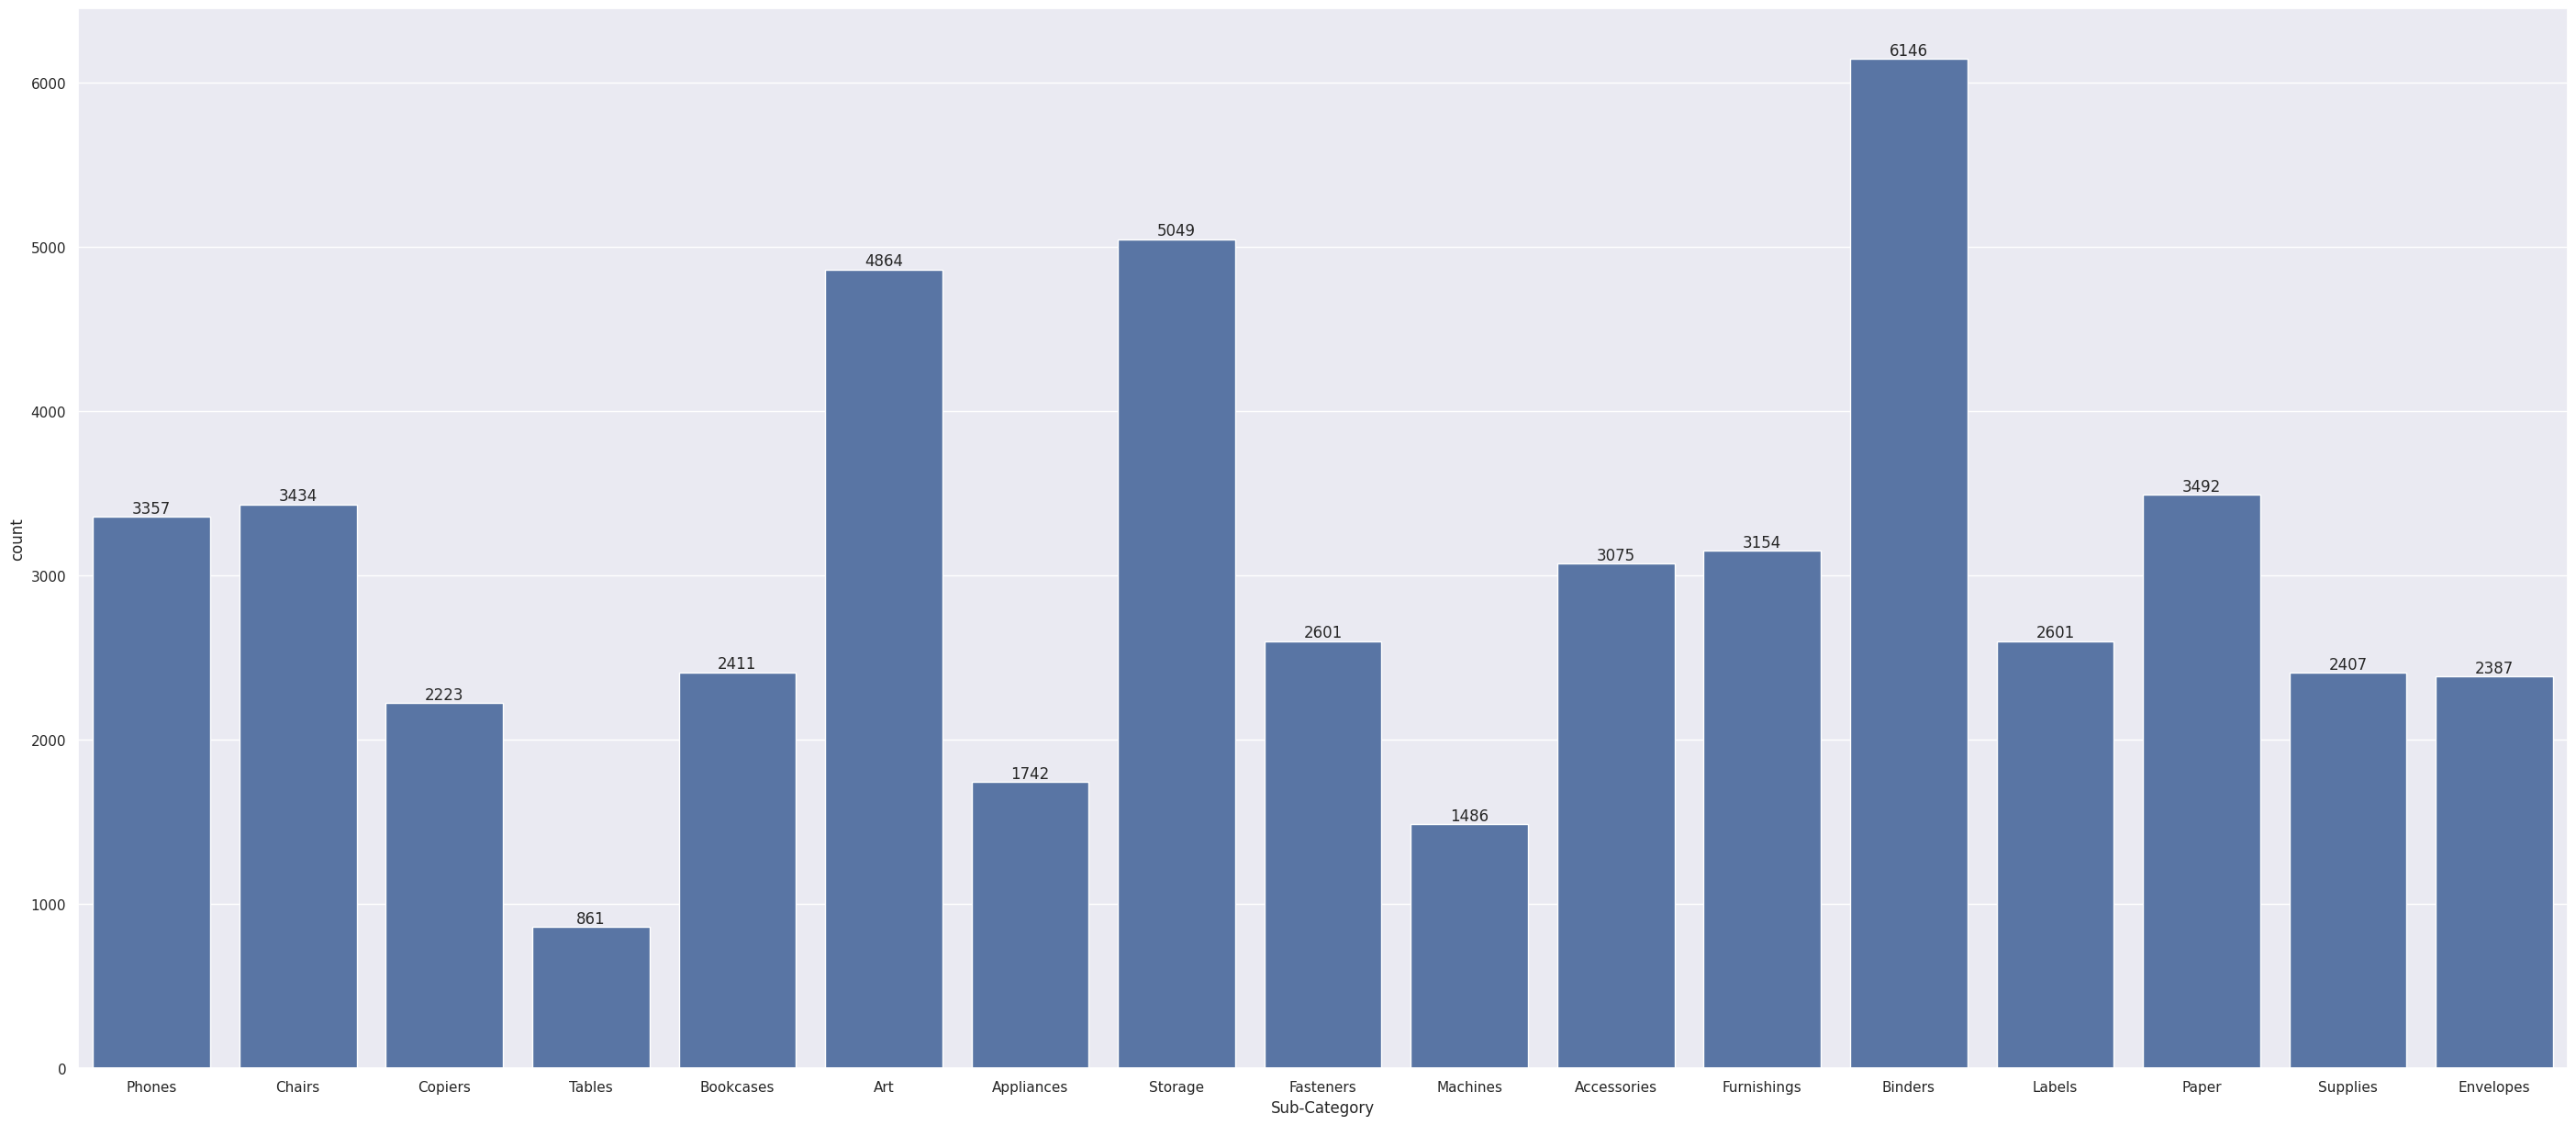

In [ ]:
a=sns.countplot(x='Sub-Category',data=df)
sns.set(rc={'figure.figsize':(35,20)})
for bars in a.containers:
  a.bar_label(bars)

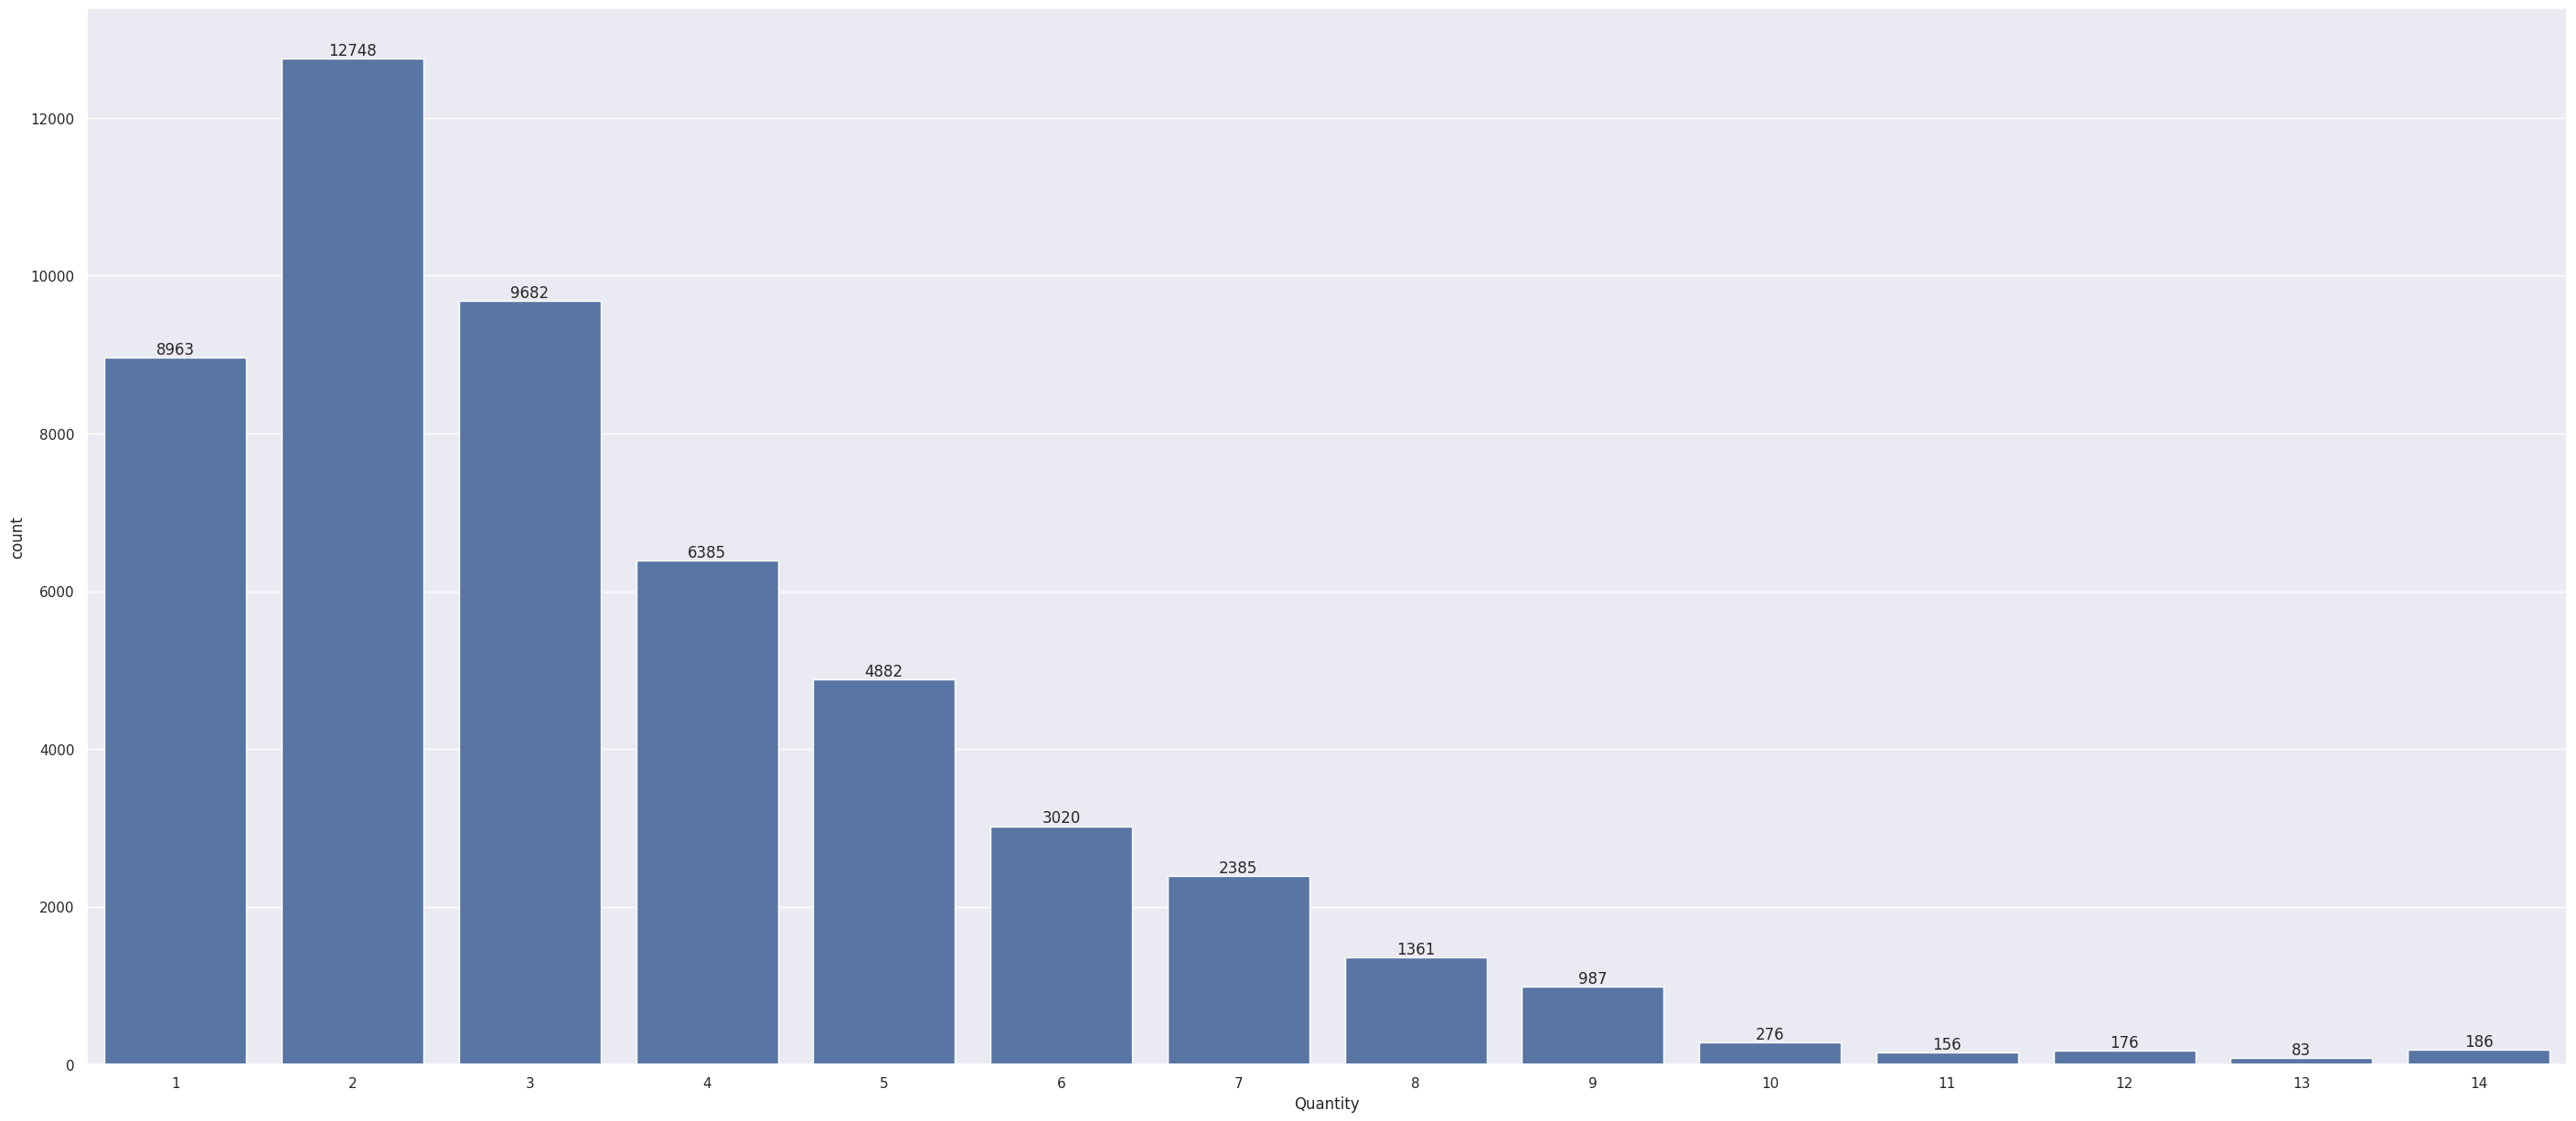

In [ ]:
a=sns.countplot(x='Quantity',data=df)
sns.set(rc={'figure.figsize':(35,10)})
for bars in a.containers:
  a.bar_label(bars)

<Axes: xlabel='Quantity', ylabel='Profit'>

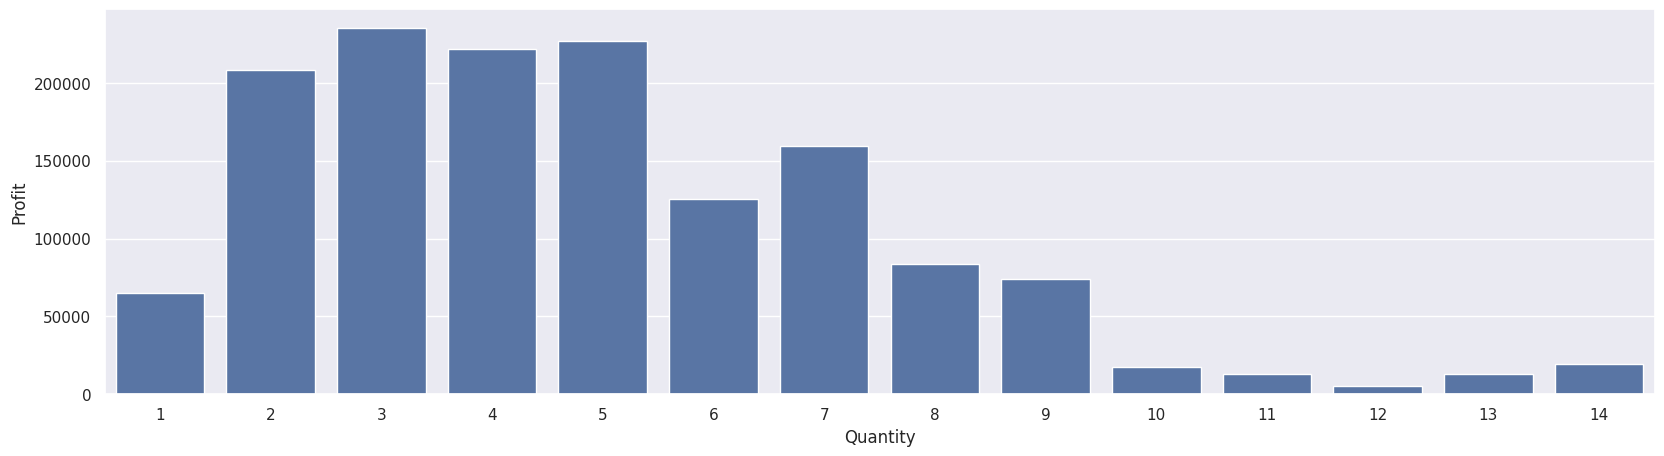

In [ ]:
a=df.groupby(['Quantity'],as_index=False)['Profit'].sum().sort_values(by='Profit',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=a,x='Quantity',y='Profit')

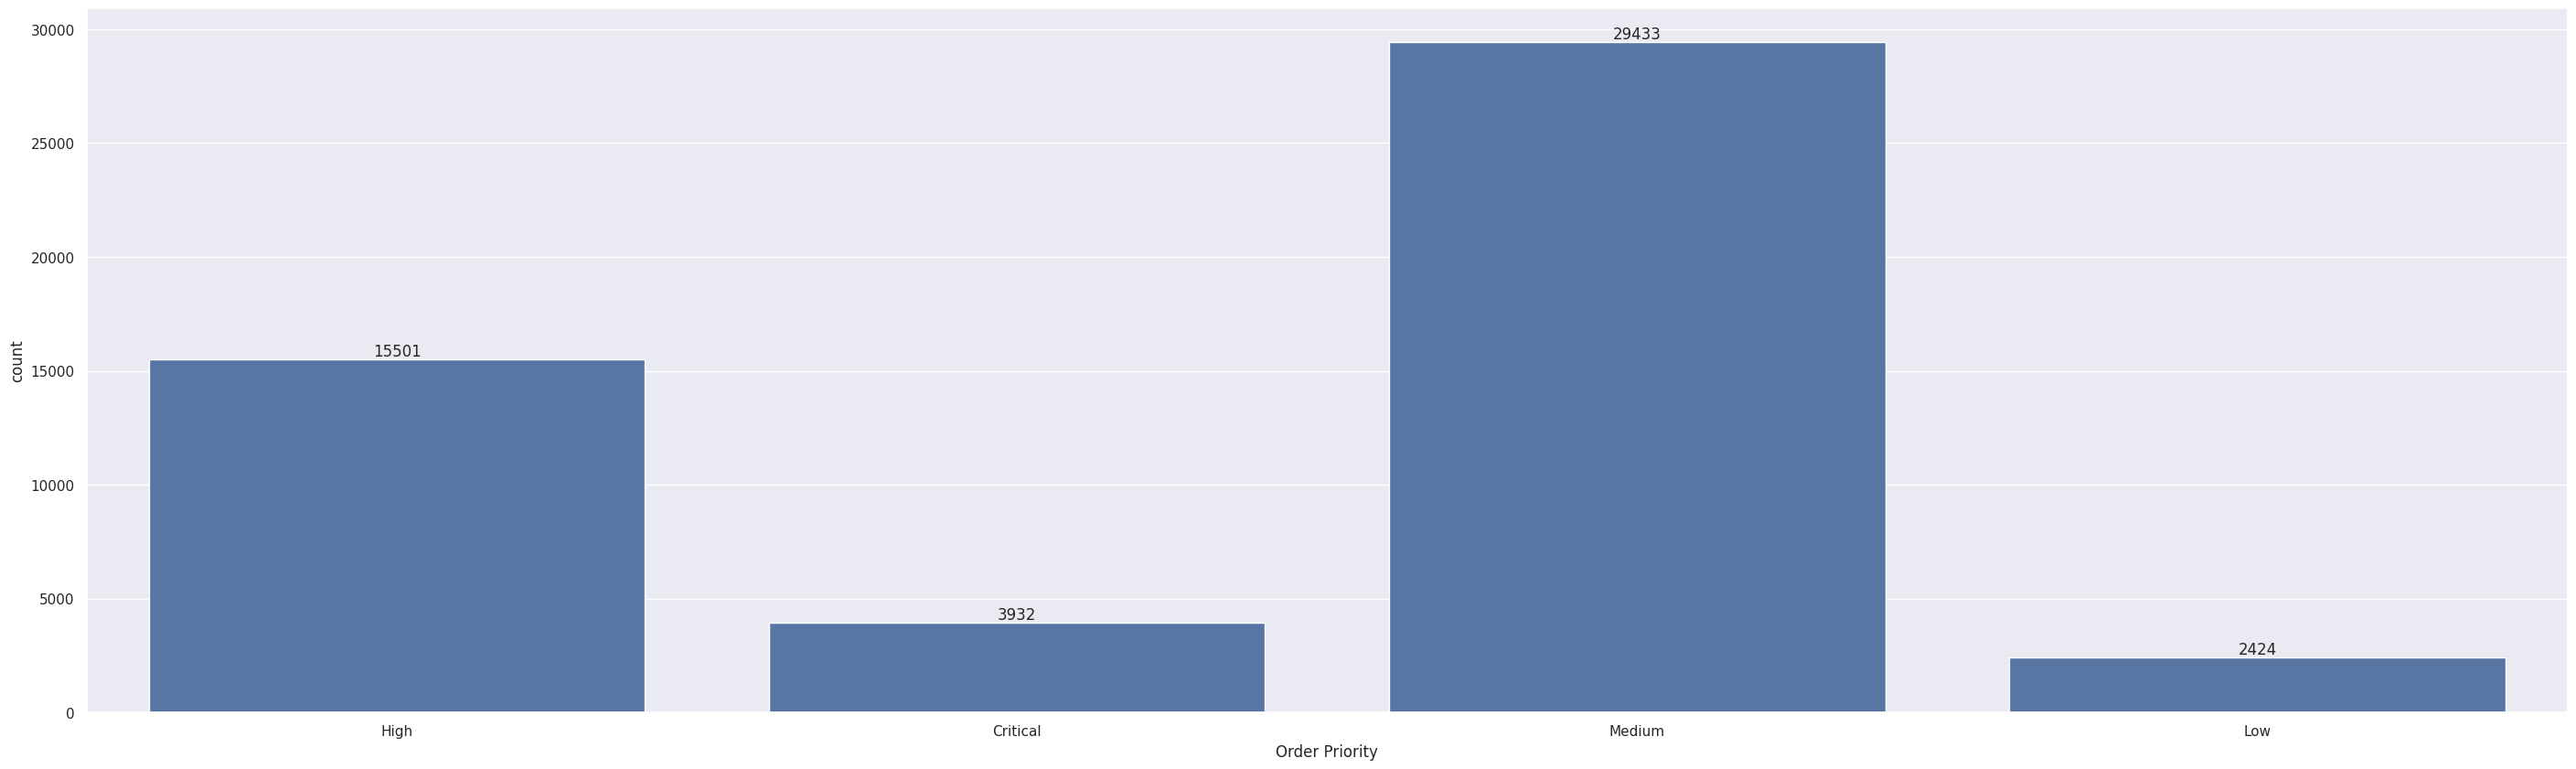

In [ ]:
a=sns.countplot(x='Order Priority',data=df)
for bars in a.containers:
  a.bar_label(bars)